# Preamble

This is a demonstration of reading the galaxy zoo dataset with python. Data is hosted at https://zenodo.org/record/4573248#.Yf0CDLso8vg (gz_decals_dr5_png_part1.zip)


see documentation on https://data.galaxyzoo.org/

Galaxy Zoo is described in Lintott et al. 2008, MNRAS, 389, 1179 and the data release is described in Lintott et al. 2011, 410, 166.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import glob


# File loading example

In [38]:
# gz_decals_dr5_png_part1.zip
directory_path = "/e/ocean1/users/vargatn/GALAXY_ZOO/"
folders = np.sort(glob.glob(directory_path + "/*"))
all_files = [np.sort(glob.glob(folder_path + "/*")) for folder_path in folders]


## Let's loop through a few images

In [39]:
fname = all_files[0][0] # first file in first folder
id_tag = fname.split("/")[-1].split(".png")[0]
im =  plt.imread(fname, format="png")

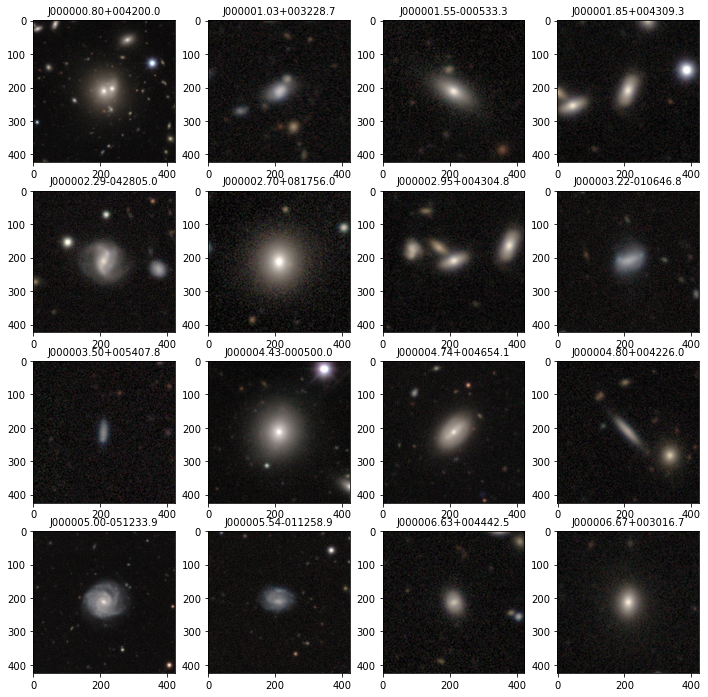

In [49]:
fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
faxarr = axarr.flatten()

for i in np.arange(16):
    fname = all_files[0][i] # first file in first folder
    id_tag = fname.split("/")[-1].split(".png")[0]

    im = plt.imread(fname, format="png")
    faxarr[i].imshow(im)
    faxarr[i].set_title(id_tag, fontsize=10)

fig.savefig("galaxy_zoo_example.png", bbox_inches="tight", dpi=300)

# Retrieve galaxy properties from galaxy zoo estimates

In [72]:
tab = pd.read_parquet(directory_path + "gz_decals_auto_posteriors.parquet")

In [76]:
fname = all_files[0][0] # first file in first folder
id_tag = fname.split("/")[-1].split(".png")[0]

In [77]:
#query the properties of each galaxy
row = np.where(tab["iauname"] == id_tag)[0]

In [92]:
"{}".format(row["mag_r"].values[0])

'13.731926918029785'

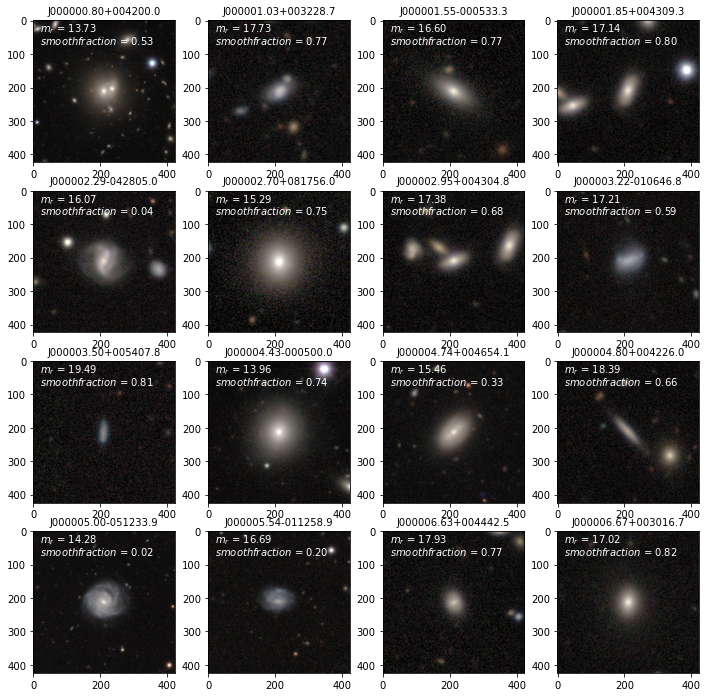

In [100]:
fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
faxarr = axarr.flatten()

for i in np.arange(16):
    fname = all_files[0][i] # first file in first folder
    id_tag = fname.split("/")[-1].split(".png")[0]
    #query the properties of each galaxy
    row = tab.loc[np.where(tab["iauname"] == id_tag)[0]]
    im = plt.imread(fname, format="png")
    faxarr[i].imshow(im)
    faxarr[i].set_title(id_tag, fontsize=10)
    faxarr[i].text(0.05, 0.92, "$m_r$ = {:.2f}".format(row["mag_r"].values[0]),
                   color="white", transform=faxarr[i].transAxes)
    faxarr[i].text(0.05, 0.83, "$smooth fraction$ = {:.2f}".format(row["smooth-or-featured_smooth_fraction"].values[0]),
                   color="white", transform=faxarr[i].transAxes)    

fig.savefig("galaxy_zoo_example_annotated.png", bbox_inches="tight", dpi=300)

In [54]:
tab.columns

Index(['ra', 'dec', 'iauname', 'petro_theta', 'petro_th50', 'petro_th90',
       'elpetro_absmag_r', 'sersic_nmgy_r', 'redshift', 'mag_r',
       'smooth-or-featured_smooth_concentration',
       'smooth-or-featured_featured-or-disk_concentration',
       'smooth-or-featured_artifact_concentration',
       'disk-edge-on_yes_concentration', 'disk-edge-on_no_concentration',
       'has-spiral-arms_yes_concentration', 'has-spiral-arms_no_concentration',
       'bar_strong_concentration', 'bar_weak_concentration',
       'bar_no_concentration', 'bulge-size_dominant_concentration',
       'bulge-size_large_concentration', 'bulge-size_moderate_concentration',
       'bulge-size_small_concentration', 'bulge-size_none_concentration',
       'how-rounded_round_concentration',
       'how-rounded_in-between_concentration',
       'how-rounded_cigar-shaped_concentration',
       'edge-on-bulge_boxy_concentration', 'edge-on-bulge_none_concentration',
       'edge-on-bulge_rounded_concentration',
 